In [28]:
import pandas as pd
import seaborn as sns
import re

sns.set_theme()

In [ ]:
myurl = "https://www.forexite.com/free_forex_quotes/2011/11/011111.zip"

for i in range(1,31):
    myurl = "https://www.forexite.com/free_forex_quotes/2011/11/" + str(i).zfill(2) + "1111.zip"
    data = pd.read_csv(myurl)
    data.to_csv("../Data/raw/FOREX2011-11-" + str(i).zfill(2) + ".csv", index=False)

In [48]:
data = pd.read_csv("../Data/raw/FOREX2011-11-01.csv")
for i in range(2,31):
    data = pd.concat([data,pd.read_csv("../Data/raw/FOREX2011-11-" + str(i).zfill(2) + ".csv")], axis=0)

data.to_csv("../Data/raw/FOREX2011-11.csv", index=False)

In [2]:
def clean_data(FX):
    FX.columns = [re.sub(r'<(.*)>',r'\1',x) for x in FX.columns]
    FX["TICKER"].replace(r"(.{3})(.{3})",r"\1/\2", regex=True, inplace=True)
    FX["TIME"] = FX["TIME"].apply(lambda x: str(x).zfill(6))
    FX["DTYYYYMMDD"] = FX["DTYYYYMMDD"].apply(lambda x: str(x))
    FX["DATETIME"] = pd.to_datetime(FX["DTYYYYMMDD"] + FX["TIME"], format="%Y%m%d%H%M%S")
    FX.index = pd.to_datetime(FX["DATETIME"])
    FX.drop(["DATETIME","DTYYYYMMDD", "TIME"], axis=1, inplace=True)
    return(FX)

In [6]:
data = pd.read_csv("../Data/raw/FOREX2011-11.csv")
clean_data(data).to_csv("../Data/clean/FOREX2011-11.csv.gz", compression="gzip")

In [7]:
data = pd.read_csv("../Data/raw/FOREX2011-11.csv")
clean_data(data).to_parquet("../Data/clean/FOREX2011-11.parquet")

In [44]:
data = pd.read_parquet("../Data/clean/FOREX2011-11.parquet")
data

,TICKER,OPEN,HIGH,LOW,CLOSE
DATETIME,,,,,
2011-11-01 00:01:00,EUR/USD,1.3841,1.3842,1.3841,1.3841
2011-11-01 00:02:00,EUR/USD,1.3841,1.3841,1.3840,1.3840
2011-11-01 00:03:00,EUR/USD,1.3841,1.3841,1.3835,1.3836
2011-11-01 00:04:00,EUR/USD,1.3836,1.3836,1.3836,1.3836
2011-11-01 00:05:00,EUR/USD,1.3837,1.3837,1.3833,1.3835
...,...,...,...,...,...
2011-11-30 23:56:00,USX/USD,78.3300,78.3400,78.3300,78.3400
2011-11-30 23:57:00,USX/USD,78.3400,78.3400,78.3300,78.3300
2011-11-30 23:58:00,USX/USD,78.3300,78.3300,78.3100,78.3200


KeyboardInterrupt: 

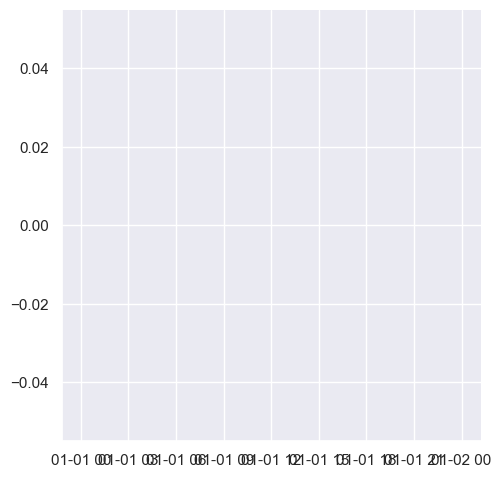

In [37]:
sns.relplot(data=data, x="DATETIME", y="CLOSE", hue="TICKER", kind="line")

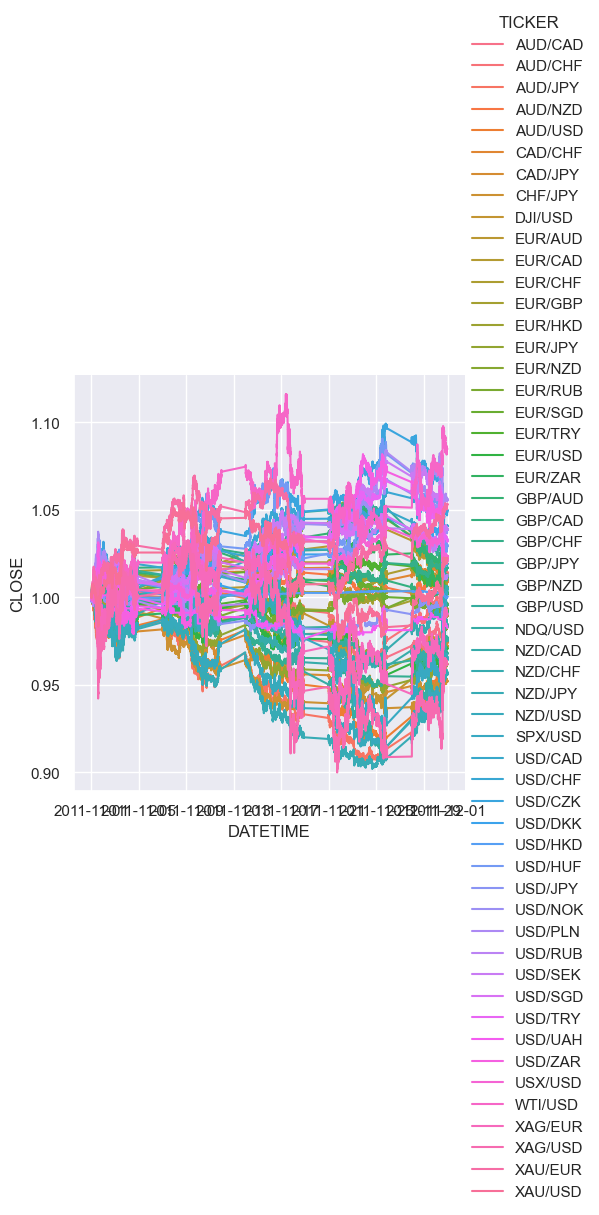

In [61]:
grouped_data = data.groupby("TICKER", group_keys=True).apply(lambda x: x / x.iloc[0])
adj_data = pd.DataFrame(grouped_data).reset_index()
sns.relplot(data=adj_data, x="DATETIME", y="CLOSE", hue="TICKER", kind="line")